In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
train.shape

(2000, 21)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [8]:
new_test=test.iloc[:,1:]

In [9]:
X=train.iloc[:,:-1]
y=train.iloc[:,-1]

In [10]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
X=Scaler.fit_transform(X)
new_test=Scaler.fit_transform(new_test)

In [11]:
new_test.shape

(1000, 20)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0,shuffle=True)

In [13]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

In [14]:
LR.score(X_train,y_train)

0.978125

In [15]:

LR.score(X_test,y_test)

0.955

In [16]:
from sklearn.metrics import confusion_matrix
CM=confusion_matrix(y_test,y_pred)

In [17]:
CM

array([[ 93,   2,   0,   0],
       [  2,  85,   5,   0],
       [  0,   3,  91,   5],
       [  0,   0,   1, 113]], dtype=int64)

<AxesSubplot:>

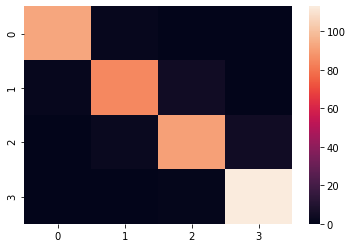

In [18]:
sns.heatmap(CM)

In [19]:
y_pred_test=LR.predict(new_test)

In [20]:
y_pred_test.shape

(1000,)

In [21]:
print(y_pred_test[200:500])

[1 2 3 2 3 2 2 1 0 0 1 2 0 2 3 3 0 2 0 3 2 3 3 1 0 1 0 3 0 1 0 2 2 1 3 1 2
 0 3 1 2 0 0 2 1 3 3 3 1 1 3 0 0 2 3 3 1 3 1 1 3 2 1 2 3 3 3 1 0 0 2 3 1 1
 3 2 1 3 0 0 3 0 0 3 2 3 3 2 1 3 3 2 3 1 2 1 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2
 3 1 3 2 2 1 2 0 0 0 1 3 2 0 0 0 3 2 0 2 3 1 2 2 2 3 1 3 3 1 2 2 3 3 0 3 1
 3 1 3 1 2 3 0 1 0 3 1 3 2 3 0 0 0 0 2 0 0 2 2 1 2 2 2 0 1 0 0 3 2 0 3 1 2
 2 1 2 3 1 1 2 2 1 2 0 1 1 0 3 2 0 0 1 0 0 1 1 0 1 0 2 2 3 2 3 0 3 0 3 0 1
 1 0 2 0 3 2 3 3 1 3 1 3 1 2 2 0 1 2 1 1 0 0 0 1 2 1 0 3 2 0 2 2 0 0 3 1 2
 0 2 3 3 0 3 0 2 3 2 3 0 2 0 2 2 0 1 1 0 0 1 2 1 3 3 3 2 3 1 2 2 3 3 3 2 0
 2 1 2 2]


In [22]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred1=svc.predict(X_test)

In [23]:
CM1=confusion_matrix(y_test,y_pred1)
CM1

array([[ 89,   6,   0,   0],
       [  4,  82,   6,   0],
       [  0,  12,  83,   4],
       [  0,   0,  12, 102]], dtype=int64)

<AxesSubplot:>

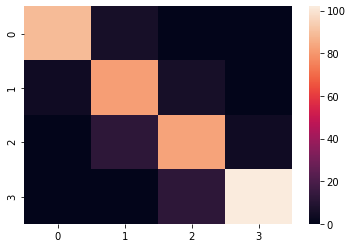

In [24]:
sns.heatmap(CM1)

In [25]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
y_pred2=RFC.predict(X_test)
CM2=confusion_matrix(y_test,y_pred2)
CM2

array([[ 94,   1,   0,   0],
       [  6,  75,  11,   0],
       [  0,  12,  75,  12],
       [  0,   0,   8, 106]], dtype=int64)

<AxesSubplot:>

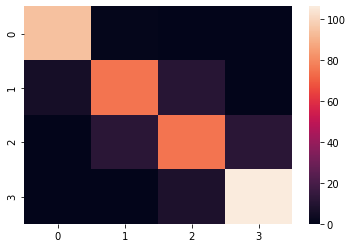

In [26]:
sns.heatmap(CM2)